In [1]:
%load_ext autoreload
%autoreload 2

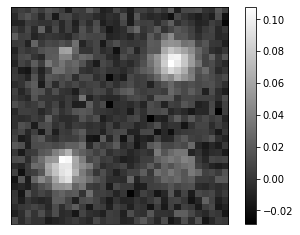

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def gkern(kernlen=21, nsig=3):
    import numpy
    import scipy.stats as st
    
    """Returns a 2D Gaussian kernel array."""
    
    interval = (2*nsig+1.)/(kernlen)
    x = numpy.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = numpy.diff(st.norm.cdf(x))
    kernel_raw = numpy.sqrt(numpy.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

## Simulate Data
np.random.seed(1)

N = 512 # number of subjects in a group
labels = np.zeros((N*2,))
labels[N:] = 1

# 2 confounding effects between 2 groups
cf = np.zeros((N*2,))
cf[:N] = np.random.uniform(1,4,size=N)
cf[N:] = np.random.uniform(3,6,size=N)

# 2 major effects between 2 groups
mf = np.zeros((N*2,))
mf[:N] = np.random.uniform(1,4,size=N)
mf[N:] = np.random.uniform(3,6,size=N)

# simulate images
x = np.zeros((N*2,32,32,1))
y = np.zeros((N*2,))
y[N:] = 1
for i in range(N*2):
    x[i,:16,:16,0] = gkern(kernlen=16, nsig=5)*mf[i]
    x[i,16:,:16,0] = gkern(kernlen=16, nsig=5)*cf[i]
    x[i,:16,16:,0] = gkern(kernlen=16, nsig=5)*cf[i]
    x[i,16:,16:,0] = gkern(kernlen=16, nsig=5)*mf[i]
    x[i] = x[i] + np.random.normal(0,0.01,size=(32,32,1))

plt.imshow(x[1,:,:,0],cmap='gray')
plt.colorbar()
#plt.title("a synthetic training image");
plt.xticks(np.arange(0), ())
plt.yticks(np.arange(0), ())
plt.savefig('synthetic_sample.jpg', format='jpg', dpi=300)

iter = 0 , acc = 0.5 , dcorr = 0.4051941931247711
Iter: 0, D: 2.075, G:0.6976
loss:  0.6976318359375



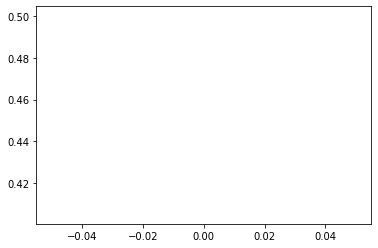

iter = 50 , acc = 0.50732421875 , dcorr = 0.8935642242431641
Iter: 50, D: 2.079, G:0.6727
loss:  0.6724004149436951



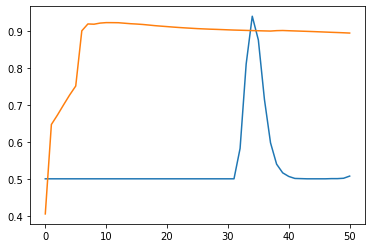

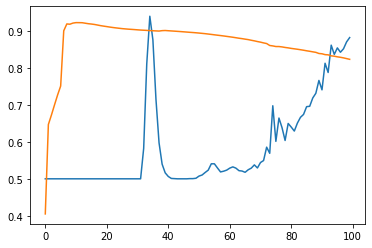

In [84]:
from datasets.toy_data import ToyData
from nma_gan import get_optimizer, discriminator2v, discriminator3v
from nma_gan import encoder, discriminator_loss, generator_loss, run_v_gan
from torch import nn
from torch.utils.data import DataLoader

device="cuda"
batch = 2000
D2 = discriminator2v(v_len=10).to(device)
D3 = discriminator3v(v_len=10).to(device)

ENC = encoder(final_activation="none").to(device)
FF = nn.Sequential(nn.ReLU(), nn.Linear(10, 1)).to(device)

data_train = ToyData(device=device, N=1024)
loader_train = DataLoader(data_train, batch_size=batch,
                          shuffle=True, drop_last=True)

D_solver = get_optimizer(nn.ModuleList([D2, D3]))
G_solver = get_optimizer(nn.ModuleList([ENC, FF]))

D2, D3, ENC, FF = run_v_gan(loader_train, D2, D3, ENC, FF, D_solver, G_solver, discriminator_loss, 
                      device, batch_size=batch, show_every=50, num_epochs=100, l=1, acc_data=data_train, name="v_space_testbatch")

/sailhome/jphwa/env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/sailhome/jphwa/env/lib/python3.8/site-packages/dcor/_fast_dcov_avl.py:492: UserWarning: Falling back to uncompiled AVL fast distance covariance because of TypeError exception raised: No matching definition for argument type(s) array(float32, 1d, C), array(float32, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


iter = 0 , acc = 0.5 , dcorr = 0.0007557407712535307
Iter: 0, D: 2.083, G:0.6922
loss:  0.6921558380126953



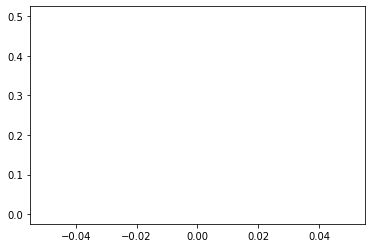

iter = 50 , acc = 0.93310546875 , dcorr = 0.47647511454061536
Iter: 50, D: 2.088, G:0.6696
loss:  0.6696320176124573



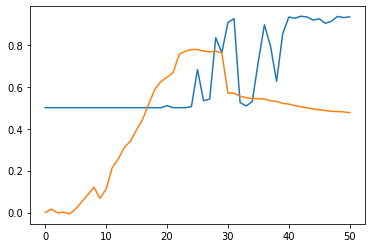

iter = 100 , acc = 0.93994140625 , dcorr = 0.4439249605471619
Iter: 100, D: 2.044, G:0.4456
loss:  0.44555267691612244



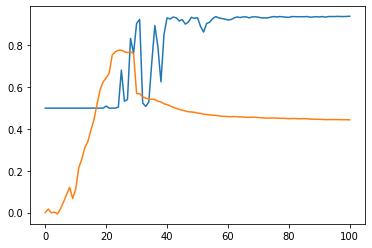

iter = 150 , acc = 0.93798828125 , dcorr = 0.4320171834972914
Iter: 150, D: 2.044, G:0.254
loss:  0.2540445923805237



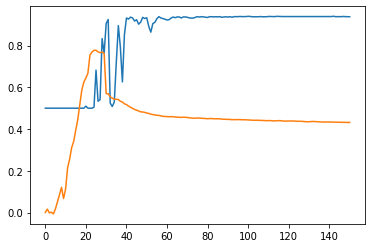

iter = 200 , acc = 0.93798828125 , dcorr = 0.42618213544268757
Iter: 200, D: 1.973, G:0.1821
loss:  0.1820695400238037



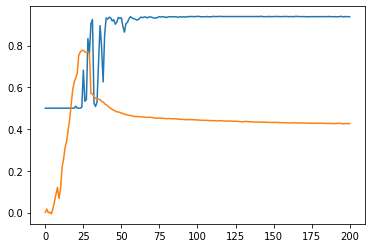

iter = 250 , acc = 0.939453125 , dcorr = 0.4238855516907221
Iter: 250, D: 1.849, G:0.1504
loss:  0.15037257969379425



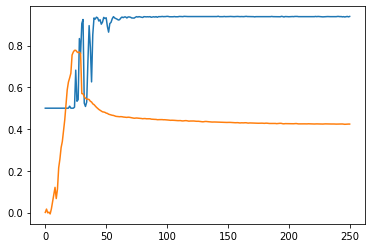

KeyboardInterrupt: 

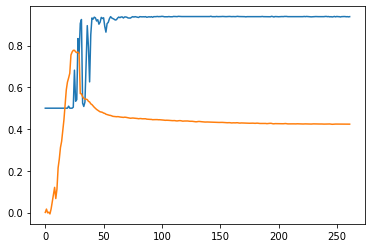

In [2]:
from datasets.toy_data import ToyData
from nma_gan import get_optimizer, discriminator2v, discriminator3v
from nma_gan import encoder, discriminator_loss, generator_loss, run_v_gan
from torch import nn
from torch.utils.data import DataLoader

device="cuda"
batch = 512
D2 = discriminator2v(v_len=10).to(device)
D3 = discriminator3v(v_len=10).to(device)

ENC = encoder(final_activation="none").to(device)
FF = nn.Sequential(nn.ReLU(), nn.Linear(10, 1)).to(device)

data_train = ToyData(device=device, N=1024)
loader_train = DataLoader(data_train, batch_size=batch,
                          shuffle=True, drop_last=True)

D_solver = get_optimizer(nn.ModuleList([D2, D3]))
G_solver = get_optimizer(nn.ModuleList([ENC, FF]))

D2, D3, ENC, FF = run_v_gan(loader_train, D2, D3, ENC, FF, D_solver, G_solver, discriminator_loss, 
                      device, batch_size=batch, show_every=50, num_epochs=100, l=0, acc_data=data_train, name="v_space_vanilla")

iter = 0 , acc = 0.5 , dcorr = 0.0052956986051773455
Iter: 0, D: 2.076, G:0.6966
loss:  0.6965527534484863



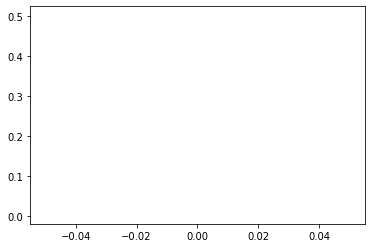

iter = 50 , acc = 0.72998046875 , dcorr = 0.4632488678171566
Iter: 50, D: 2.084, G:0.6851
loss:  0.6845390796661377



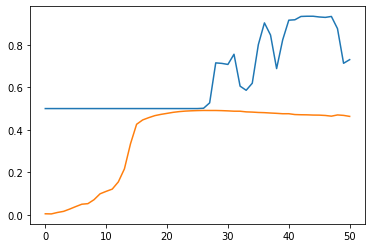

iter = 100 , acc = 0.5 , dcorr = 0.18533469092724458
Iter: 100, D: 2.074, G:0.6901
loss:  0.6891845464706421



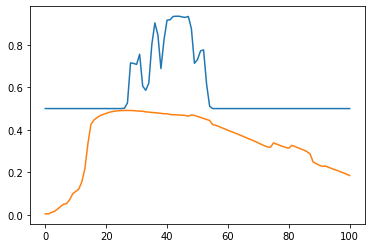

iter = 150 , acc = 0.5 , dcorr = 0.03542376355583205
Iter: 150, D: 2.091, G:0.6793
loss:  0.6792688965797424



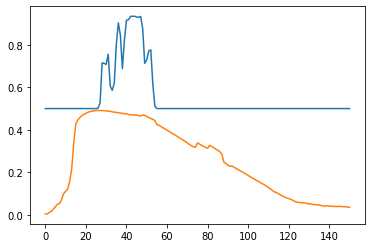

iter = 200 , acc = 0.6240234375 , dcorr = 0.020816484285220493
Iter: 200, D: 2.1, G:0.6683
loss:  0.6677789092063904



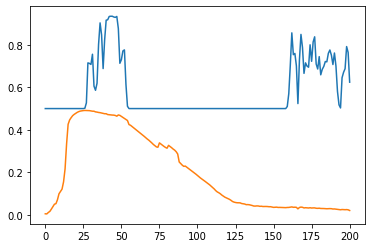

iter = 250 , acc = 0.85302734375 , dcorr = 0.012769141024211022
Iter: 250, D: 2.108, G:0.6587
loss:  0.6576150059700012



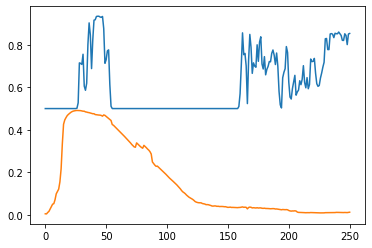

iter = 300 , acc = 0.5 , dcorr = 0.04819794599099905
Iter: 300, D: 2.108, G:0.6581
loss:  0.6553935408592224



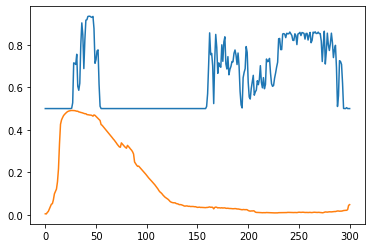

iter = 350 , acc = 0.890625 , dcorr = 0.04620836882496401
Iter: 350, D: 2.121, G:0.6352
loss:  0.6319972276687622



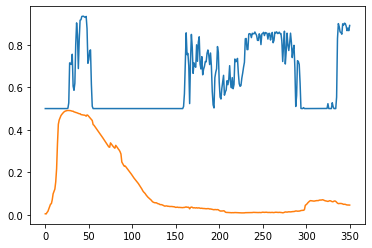

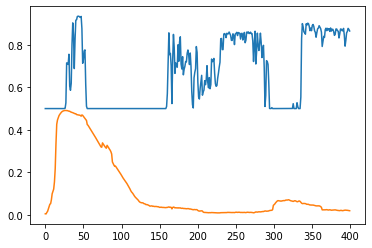

In [4]:
from datasets.toy_data import ToyData
from nma_gan import get_optimizer, discriminator2v, discriminator3v
from nma_gan import encoder, discriminator_loss, generator_loss, run_v_gan
from torch import nn
from torch.utils.data import DataLoader

device="cuda"
batch = 512
D2 = discriminator2v(v_len=10).to(device)
D3 = discriminator3v(v_len=10).to(device)

ENC = encoder(final_activation="none").to(device)
FF = nn.Sequential(nn.ReLU(), nn.Linear(10, 1)).to(device)

data_train = ToyData(device=device, N=1024)
loader_train = DataLoader(data_train, batch_size=batch,
                          shuffle=True, drop_last=True)

D_solver = get_optimizer(nn.ModuleList([D2, D3]))
G_solver = get_optimizer(nn.ModuleList([ENC, FF]))

D2, D3, ENC, FF = run_v_gan(loader_train, D2, D3, ENC, FF, D_solver, G_solver, discriminator_loss, 
                      device, batch_size=batch, show_every=50, num_epochs=100, l=30, acc_data=data_train, name="v_space_30")

In [68]:
import pickle
for name in ["v_space_30_dcors.pkl", "v_space_30_accs.pkl", "v_space_dcors.pkl", "v_space_accs.pkl", "vanilla_dcors.pkl", "vanilla_accs.pkl"]:
    with open(name, "rb") as fp:
        li = pickle.load(fp)
    print(name, li[-4:])

v_space_30_dcors.pkl [0.7219377756118774, 0.7242730855941772, 0.7229254245758057, 0.7160236239433289]
v_space_30_accs.pkl [0.50146484375, 0.67529296875, 0.5869140625, 0.5]
v_space_dcors.pkl [0.7408981919288635, 0.7409151792526245, 0.7409982681274414, 0.7413964867591858]
v_space_accs.pkl [0.91845703125, 0.9189453125, 0.91845703125, 0.92236328125]
vanilla_dcors.pkl [0.8786426782608032, 0.8786925673484802, 0.878759503364563, 0.8785784244537354]
vanilla_accs.pkl [0.939453125, 0.93896484375, 0.9365234375, 0.93896484375]


15
iter = 0 , acc = 0.5 , dcorr = 0.2721262574195862
Iter: 0, D: 2.062, G:0.71
loss:  0.709952175617218



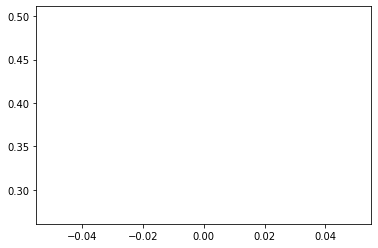

iter = 50 , acc = 0.53857421875 , dcorr = 0.7885462045669556
Iter: 50, D: 2.081, G:0.6905
loss:  0.6905006766319275



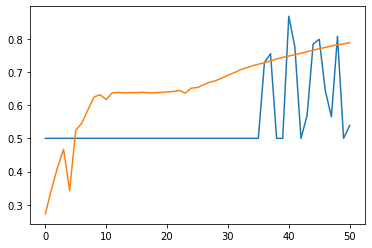

iter = 100 , acc = 0.5 , dcorr = 0.8220753073692322
Iter: 100, D: 2.074, G:0.6884
loss:  0.6879682540893555



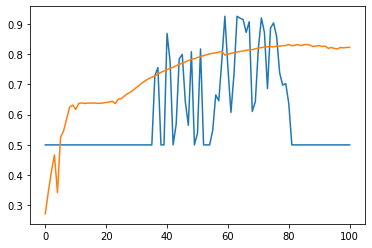

iter = 150 , acc = 0.5 , dcorr = 0.8433535695075989
Iter: 150, D: 2.075, G:0.6877
loss:  0.6866899728775024



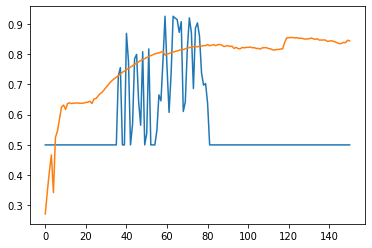

iter = 200 , acc = 0.61962890625 , dcorr = 0.8148601055145264
Iter: 200, D: 2.079, G:0.6829
loss:  0.6821088790893555



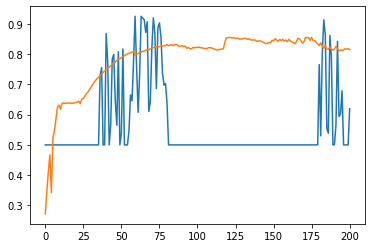

iter = 250 , acc = 0.5029296875 , dcorr = 0.7836951613426208
Iter: 250, D: 2.092, G:0.6704
loss:  0.6702769994735718



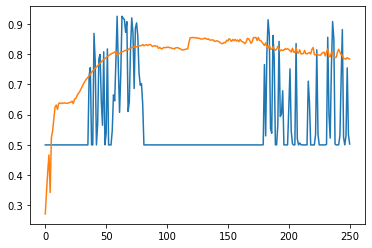

iter = 300 , acc = 0.91650390625 , dcorr = 0.7765613794326782
Iter: 300, D: 2.128, G:0.6266
loss:  0.6255323886871338



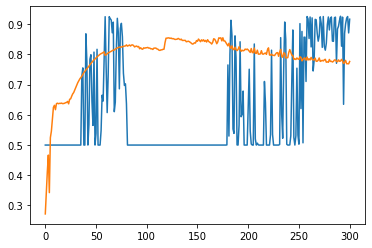

iter = 350 , acc = 0.8974609375 , dcorr = 0.765203595161438
Iter: 350, D: 2.211, G:0.5413
loss:  0.5366232991218567



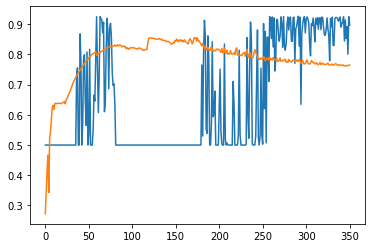

l = 15 , acc = 0.92529296875
23
iter = 0 , acc = 0.5 , dcorr = 0.25948429107666016
Iter: 0, D: 2.076, G:0.6966
loss:  0.6965528130531311



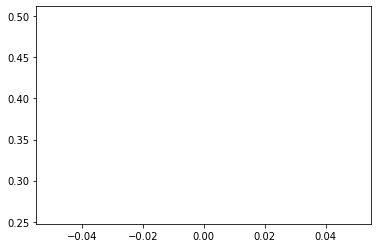

iter = 50 , acc = 0.7880859375 , dcorr = 0.8803717494010925
Iter: 50, D: 2.084, G:0.6847
loss:  0.6842212677001953



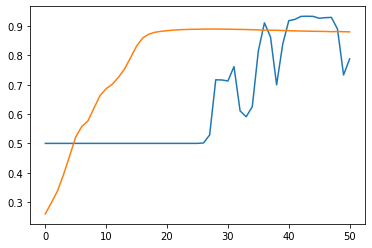

iter = 100 , acc = 0.5 , dcorr = 0.7777402997016907
Iter: 100, D: 2.073, G:0.6914
loss:  0.6905398964881897



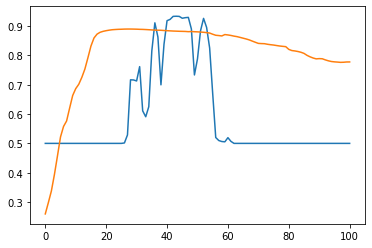

iter = 150 , acc = 0.5 , dcorr = 0.7451034188270569
Iter: 150, D: 2.077, G:0.6911
loss:  0.6909419298171997



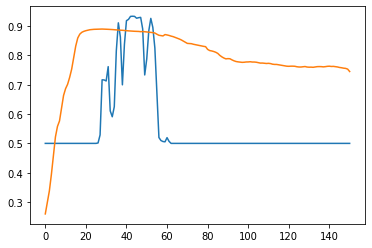

iter = 200 , acc = 0.5 , dcorr = 0.6834105849266052
Iter: 200, D: 2.091, G:0.6772
loss:  0.6769339442253113



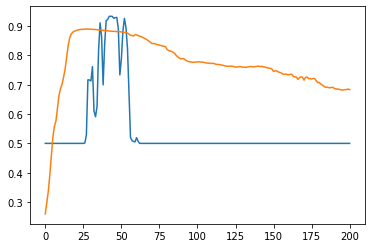

iter = 250 , acc = 0.537109375 , dcorr = 0.7667284607887268
Iter: 250, D: 2.081, G:0.682
loss:  0.6815578937530518



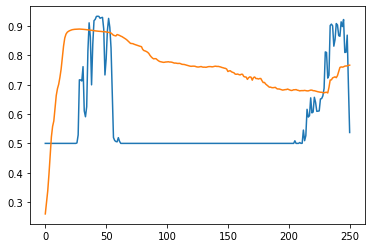

iter = 300 , acc = 0.8125 , dcorr = 0.7661000490188599
Iter: 300, D: 2.084, G:0.6786
loss:  0.6773544549942017



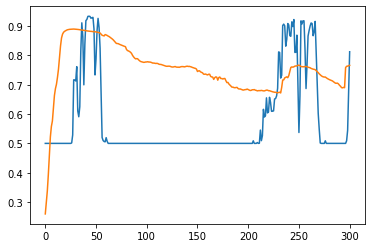

iter = 350 , acc = 0.80615234375 , dcorr = 0.7156294584274292
Iter: 350, D: 2.103, G:0.6578
loss:  0.6564283967018127



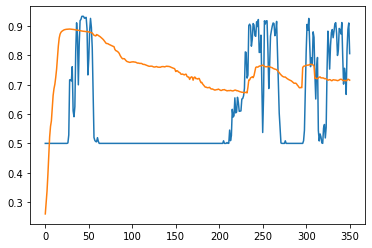

l = 23 , acc = 0.83544921875
best l: 30 - 16


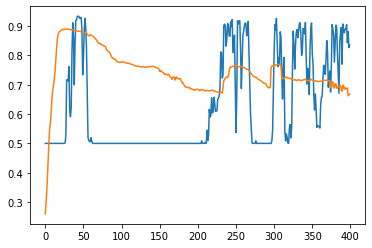

In [73]:
import torch
l = 1
r = 30
while l < r:
    m = int((l + r) / 2)
    print(m)

    D2 = discriminator2v(v_len=10).to(device)
    D3 = discriminator3v(v_len=10).to(device)

    ENC = encoder(final_activation="none").to(device)
    FF = nn.Sequential(nn.ReLU(), nn.Linear(10, 1)).to(device)
    D_solver = get_optimizer(nn.ModuleList([D2, D3]))
    G_solver = get_optimizer(nn.ModuleList([ENC, FF]))

    data_train = ToyData(device=device, N=1024)
    loader_train = DataLoader(data_train, batch_size=batch,
                              shuffle=True, drop_last=True)
    
    D2, D3, ENC, FF = run_v_gan(loader_train, D2, D3, ENC, FF, D_solver, G_solver, discriminator_loss, 
                      device, batch_size=batch, show_every=50, num_epochs=100, l=m, acc_data=data_train)
    features = ENC(data_train.x.view(-1, 1, 32, 32)).squeeze()
    y_preds = FF(features).squeeze()
    y_preds = (torch.sign(y_preds) + 1) / 2
    train_acc = (torch.sum(y_preds == data_train.y) / len(data_train)).item()
    print("l =", m, ", acc =", train_acc)
    if train_acc < 0.81:
        r = m
    elif train_acc > 0.84:
        l = m + 1
    else:
        break
print("best l:", r, "-", l)

1
Iter: 0, D: 2.083, G:0.69
loss:  0.689975380897522

Iter: 50, D: 2.087, G:0.6696
loss:  0.6693074703216553

Iter: 100, D: 2.228, G:0.457
loss:  0.449593722820282

Iter: 150, D: 2.403, G:0.2506
loss:  0.2441015988588333

l = 1 , acc = 0.93505859375
2
Iter: 0, D: 2.083, G:0.69
loss:  0.6899753212928772

Iter: 50, D: 2.089, G:0.6698
loss:  0.6693500876426697

Iter: 100, D: 2.205, G:0.5024
loss:  0.4908943176269531

Iter: 150, D: 2.38, G:0.3001
loss:  0.29049116373062134

l = 2 , acc = 0.93212890625
3
Iter: 0, D: 2.083, G:0.69
loss:  0.6899753212928772

Iter: 50, D: 2.088, G:0.6701
loss:  0.6694706678390503

Iter: 100, D: 2.147, G:0.5751
loss:  0.5646016597747803

Iter: 150, D: 2.277, G:0.4265
loss:  0.4196341633796692

l = 3 , acc = 0.9296875
4
Iter: 0, D: 2.083, G:0.69
loss:  0.689975380897522

Iter: 50, D: 2.089, G:0.6703
loss:  0.6695765852928162

Iter: 100, D: 2.144, G:0.5928
loss:  0.5830838680267334

Iter: 150, D: 2.237, G:0.4856
loss:  0.48268115520477295

l = 4 , acc = 0.921875


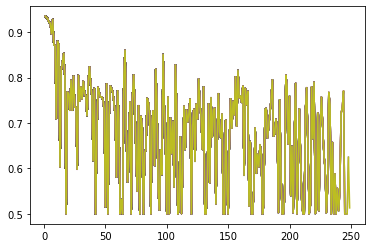

In [12]:
import torch
l = 1
r = 250
accs = []
for i in range(l, r):
    print(i)

    D2 = discriminator2v(v_len=10).to(device)
    D3 = discriminator3v(v_len=10).to(device)

    ENC = encoder(final_activation="none").to(device)
    FF = nn.Linear(10, 1).to(device)
    D_solver = get_optimizer(nn.ModuleList([D2, D3]))
    G_solver = get_optimizer(nn.ModuleList([ENC, FF]))

    data_train = ToyData(device=device, N=1024)
    loader_train = DataLoader(data_train, batch_size=batch,
                              shuffle=True, drop_last=True)
    
    D2, D3, ENC, FF = run_v_gan(loader_train, D2, D3, ENC, FF, D_solver, G_solver, discriminator_loss, 
                      device, batch_size=batch, show_every=50, num_epochs=50, l=i)
    features = ENC(data_train.x.view(-1, 1, 32, 32)).squeeze()
    y_preds = FF(features).squeeze()
    y_preds = (torch.sign(y_preds) + 1) / 2
    train_acc = (torch.sum(y_preds == data_train.y) / len(data_train)).item()
    print("l =", i, ", acc =", train_acc)
    accs.append(train_acc)
    plt.close()
    plt.plot(range(l, i+1), accs)
    plt.savefig("test.png")

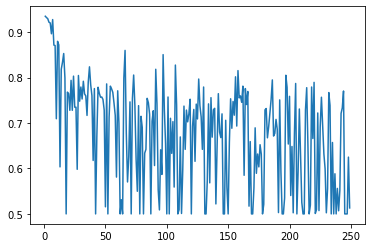

In [13]:
plt.close()
plt.plot(range(l, r), accs)
plt.savefig("accuraciesbyl_stratified.png")

In [37]:
import torch
features = ENC(data_train.x.view(-1, 1, 32, 32)).squeeze()
y_preds = FF(features).squeeze()
y_preds = (torch.sign(y_preds) + 1) / 2
train_acc = torch.sum(y_preds == data_train.y)
print("Accuracy:", (train_acc/len(data_train)).item())

Accuracy: 0.8271484375


Text(0, 0.5, 'sigma_A')

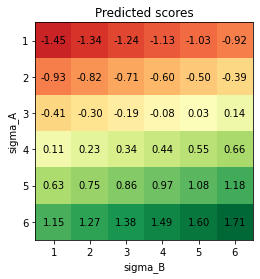

In [79]:
from datasets import toy_data
import torch
import matplotlib.pyplot as plt
import numpy as np
G = nn.Sequential(ENC, FF)
data = toy_data.full_toy_data(device=device)
# data += torch.normal(0, 0.01, size=(6, 6, 32, 32), device=device)
preds = G(data.view(-1, 1, 32, 32)).reshape(6, 6)
scale = max(torch.abs(torch.min(preds)), torch.abs(torch.max(preds)))
fig, ax = plt.subplots()
im = ax.imshow(preds.detach().cpu().numpy(), cmap="RdYlGn", vmin=-scale, vmax=scale)

ax.set_xticks(np.arange(preds.shape[1]), labels=np.arange(preds.shape[1]) + 1)
ax.set_yticks(np.arange(preds.shape[0]), labels=np.arange(preds.shape[0]) + 1)
for i in range(preds.shape[0]):
    for j in range(preds.shape[1]):
        text = ax.text(j, i, f"{preds[i, j]:0.2f}",
                       ha="center", va="center", color="k")
ax.set_title("Predicted scores")
ax.set_xlabel('sigma_B')
ax.set_ylabel('sigma_A')

In [49]:
print(f"sigma_A = {data_train.mf[2].item()}\nsigma_B = {data_train.cf[2].item()}")

sigma_A = 1.6351224184036255
sigma_B = 1.265432357788086


In [48]:
sample = torch.clone(data_train.x[2, 0, :, :])

In [50]:
# predicted label for sample (low sigma_A, low sigma_B)
G(sample.view(1, 1, 32, 32)).item()

-0.20508036017417908

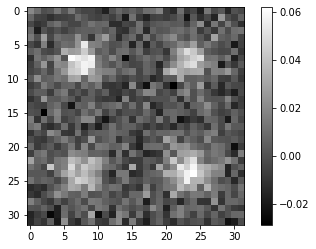

In [51]:
# visual representation of sample
import matplotlib.pyplot as plt
plt.imshow(sample,cmap='gray')
plt.colorbar()

In [117]:
# increase sigma_B (low sigma_A, high sigma_B)
sample[16:, :16] = torch.from_numpy(gkern(kernlen=16, nsig=5)) * 6 #+ torch.normal(0, 0.01, size=(16, 16))
sample[:16, 16:] = torch.from_numpy(gkern(kernlen=16, nsig=5)) * 6 #+ torch.normal(0, 0.01, size=(16, 16))

In [53]:
G(sample.view(1, 1, 32, 32)).item()

-0.028424113988876343

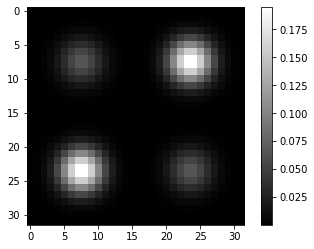

In [120]:
import matplotlib.pyplot as plt
plt.imshow(sample,cmap='gray')
plt.colorbar()

In [122]:
# now increase sigma_A (high sigma_A, high sigma_B)
sample[:16, :16] = torch.from_numpy(gkern(kernlen=16, nsig=5)) * 6 #+ torch.normal(0, 0.01, size=(16, 16))
sample[16:, 16:] = torch.from_numpy(gkern(kernlen=16, nsig=5)) * 6 #+ torch.normal(0, 0.01, size=(16, 16))

In [123]:
G(sample.view(1, 1, 32, 32)).item()

0.33552566170692444

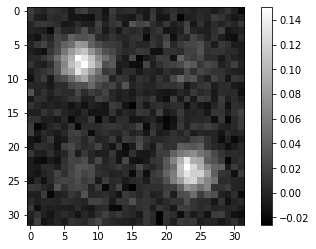

In [91]:
import matplotlib.pyplot as plt
plt.imshow(sample,cmap='gray')
plt.colorbar()

In [92]:
# decrease sigma_B (high sigma_A, low sigma_B)
sample[16:, :16] = torch.from_numpy(gkern(kernlen=16, nsig=5)) * 6 + torch.normal(0, 0.01, size=(16, 16))
sample[:16, 16:] = torch.from_numpy(gkern(kernlen=16, nsig=5)) * 6 + torch.normal(0, 0.01, size=(16, 16))

In [93]:
G(sample.view(1, 1, 32, 32)).item()

0.19597479701042175

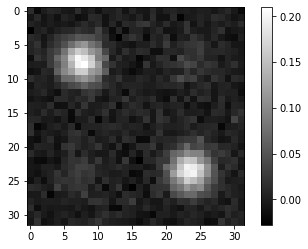

In [74]:
import matplotlib.pyplot as plt
plt.imshow(sample,cmap='gray')
plt.colorbar()

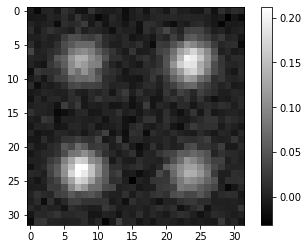

In [113]:
import matplotlib.pyplot as plt
plt.imshow(data[3, 5, :, :],cmap='gray')
plt.colorbar()

In [378]:
good_classifier = G